In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
#Read the diabetes data as a pandas dataframe and observe the 1st 5 observations
df = pd.read_csv('diabetes_updated.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


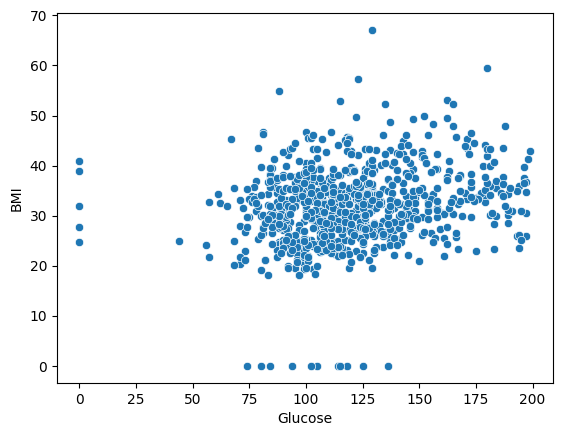

In [38]:
plt.figure()
sns.scatterplot(data=df, x='Glucose', y='BMI')
plt.show()
plt.close()

In [6]:
#Determine f there are any missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Determine if there are any duplicates
df.duplicated().sum()

0

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [17]:
#Diferentiate between independent variables and dependent variable and assign them X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

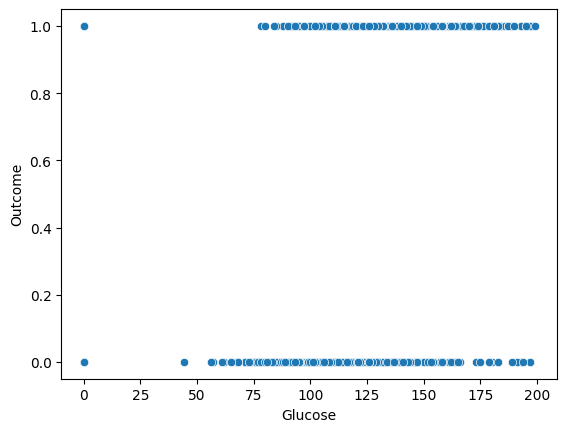

In [18]:
#Visualise the relationship between the dependent variable and the independent variables
plt.figure()
sns.scatterplot(data=X, x='Glucose', y=y)
plt.show()
plt.close()

In [20]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

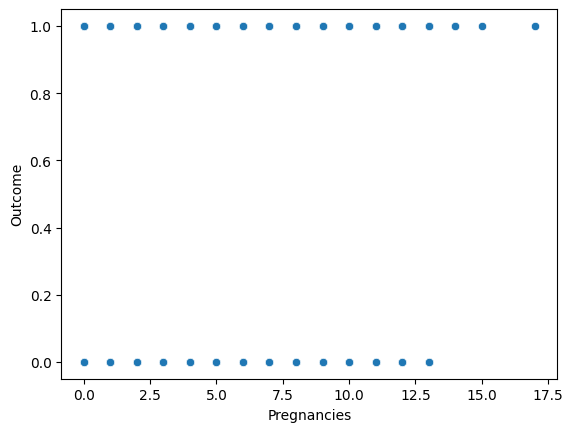

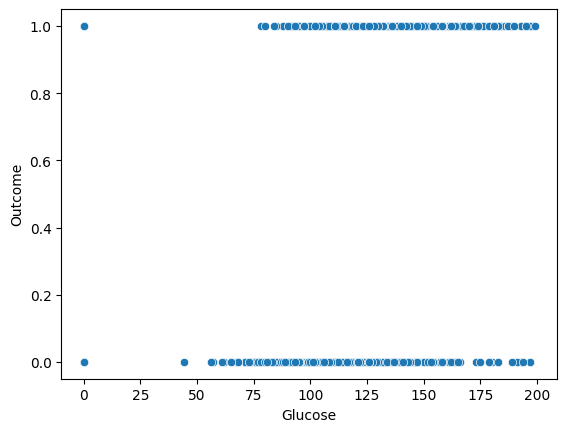

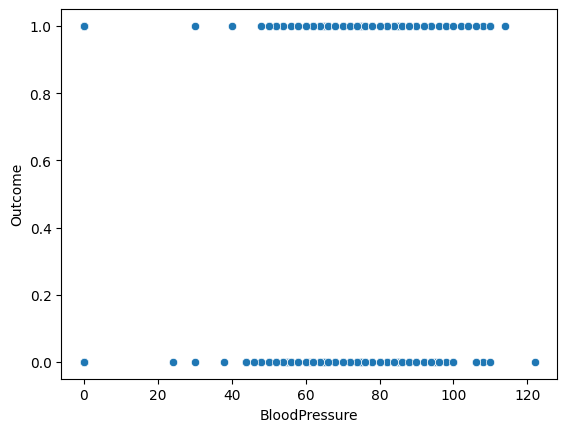

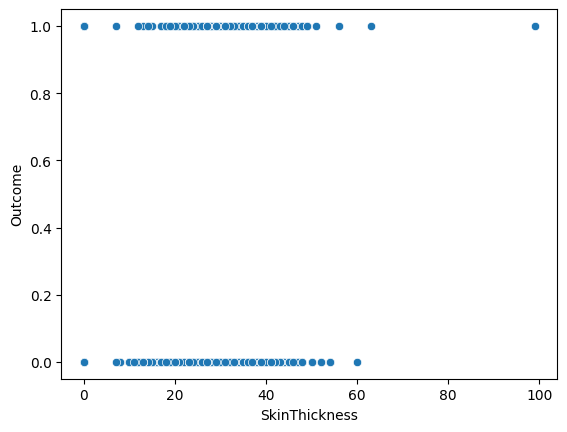

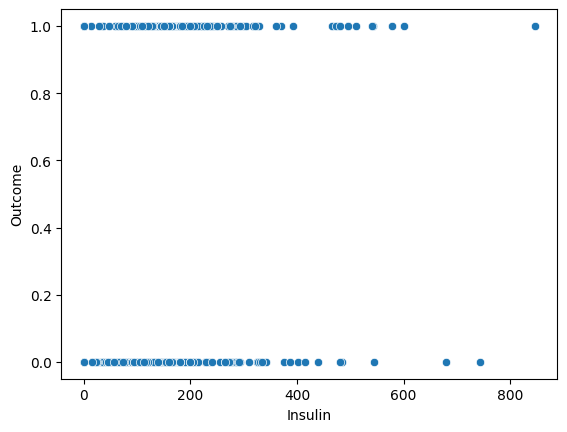

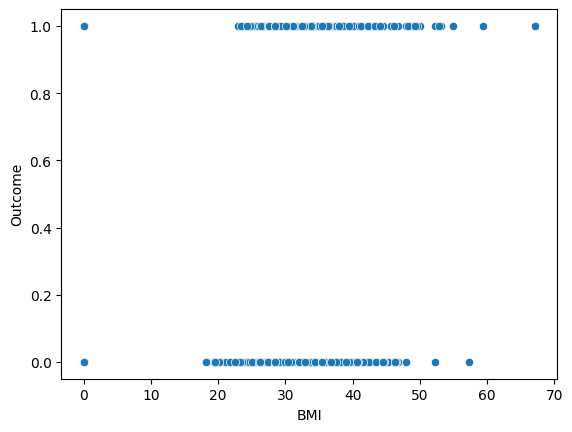

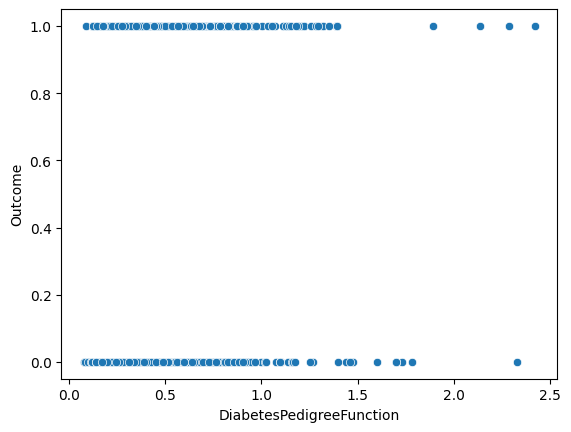

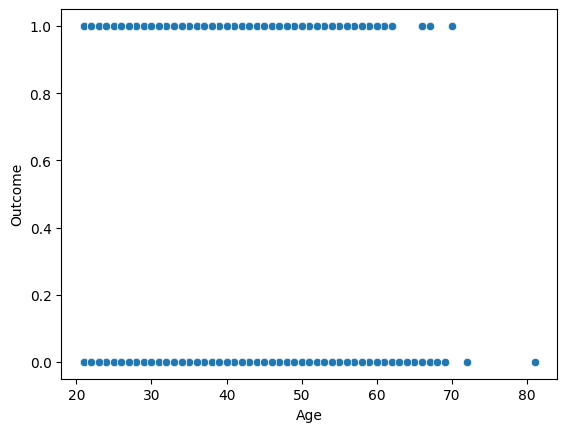

In [21]:
for col in X.columns:
    sns.scatterplot(data=X, x=col, y=y)
    plt.show()

<Axes: >

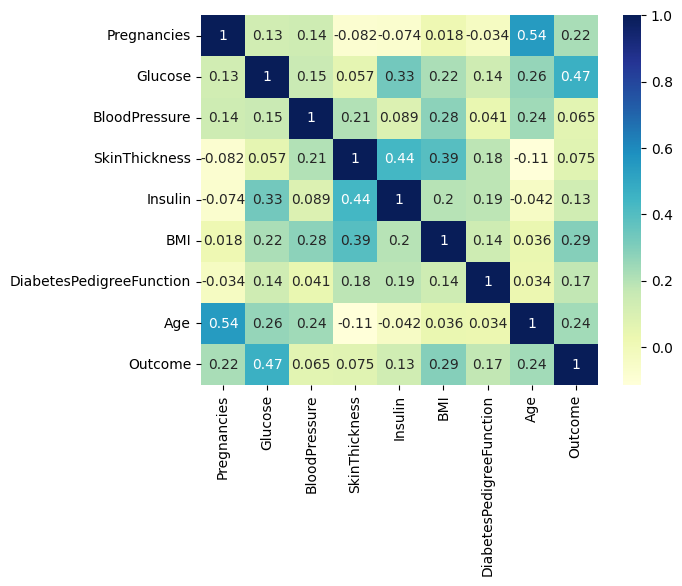

In [22]:
#Generate a correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [27]:
#Drop skinthinkess and bloodpressure as they have close to zero correlation 

X = X.drop('BloodPressure', axis=1)
X

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33
...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63
764,2,122,0,36.8,0.340,27
765,5,121,112,26.2,0.245,30
766,1,126,0,30.1,0.349,47


In [ ]:
#sci-kit learn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc


In [30]:
#Execute the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)


#Normalise the features (NB: MinMax for data that is not N and z-score standardisation for N)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #NB: not all X features need standardisation
X_test_scaled = scaler.fit_transform(X_test) #NB: Glucose, Inslin, BMI & DiabetesPedegreeFunction


In [31]:
X.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [32]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [33]:
#Implementing the Logistic Regression Model

from sklearn.linear_model import LogisticRegression


#Initialise the logistic regression model

log_reg = LogisticRegression()

#Fit the logistic regression model
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [34]:
#Predict the model
y_pred = log_reg.predict(X_test_scaled)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1])

In [37]:
#Evaluate th performance of the model by mean of Performance Metrics

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc

print('Accuracy Score: ', accuracy_score(y_pred, y_test))
print('Confusion Matrix: \n', confusion_matrix(y_pred, y_test))
print('Classification Reports: \n', classification_report(y_pred, y_test))
print('Area under the Reciever Operating Curve, ROC: ', roc_auc_score(y_pred, y_test))

Accuracy Score:  0.7142857142857143
Confusion Matrix: 
 [[85 28]
 [16 25]]
Classification Reports: 
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       113
           1       0.47      0.61      0.53        41

    accuracy                           0.71       154
   macro avg       0.66      0.68      0.66       154
weighted avg       0.74      0.71      0.72       154

Area under the Reciever Operating Curve, ROC:  0.6809842434707534
